Step  1: Import Libraries

In [ ]:
import numpy as np
from skimage import io, color
from skimage.transform import resize
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn import metrics
import random

Step  2: Mounting google drive (to load data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 3: Path to the data directory 

In [ ]:
DATADIR = "/content/drive/My Drive/FDP_DL/Kmeans/DATA/"  # Please change path of data 
CATEGORIES = ["NORMAL", "COVID"]

Step 4: Load data from directory

In [ ]:
IMG_SIZE = 256
training_data = []

def create_training_data():
  
  print('Loading: ')
  for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    
    class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 
    count = 0
    for img in os.listdir(path):  # iterate over each image 
      count = count + 1 
      if count == 101:
        break
      print('.',end="")
      try:
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
          training_data.append([new_array, class_num])  # add this to our training_data
      except Exception as e:  # in the interest in keeping the output clean...
          pass

  print('\nData Loading completed')
create_training_data()

# print(len(training_data))

Loading: 
........................................................................................................................................................................................................
Data Loading completed
200


In [ ]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1],end=", ")

1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
x = np.array(X)  # converting list to numpy array                                

In [ ]:
x = x.reshape((x.shape[0], -1))

In [ ]:
x.shape

(200, 65536)

In [ ]:
n_clusters = len(CATEGORIES)
print('Number of clusters: ', n_clusters)

Number of clusters:  2


Kmeans function takes number of K, rest of the values are optional. 

sklearn.cluster.KMeans(n_clusters=K, max_iter=300, verbose=0, n_jobs='deprecated')

K = number of clusters
verbose = 0:  Verbosity Mode
max_iter = Maximum  number of iterations


In [ ]:
kmeans = KMeans(n_clusters=n_clusters, n_jobs=16)
y_pred_kmeans = kmeans.fit_predict(x)

In [ ]:
k_means = kmeans
print(k_means.labels_[1:10])
print(y[1:10])

# k_means.predict(x)

[0 1 1 0 0 0 0 0 0]
[1, 1, 1, 0, 1, 0, 0, 0, 0]


In [ ]:
x.shape

(200, 65536)

Label:  [1]	Actual Label:  [1]


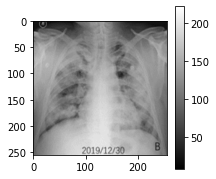

Label:  [1]	Actual Label:  [1]


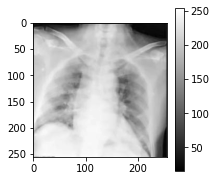

Label:  [1]	Actual Label:  [1]


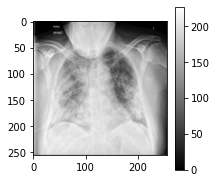

Label:  [1]	Actual Label:  [1]


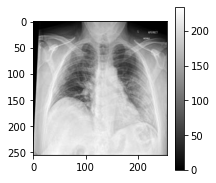

Label:  [1]	Actual Label:  [1]


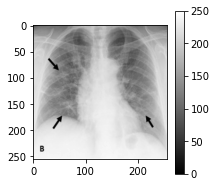

Label:  [1]	Actual Label:  [1]


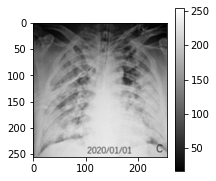

Label:  [1]	Actual Label:  [1]


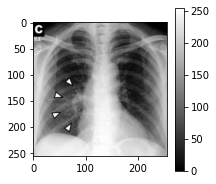

Label:  [1]	Actual Label:  [1]


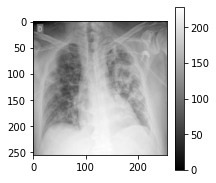

Label:  [1]	Actual Label:  [1]


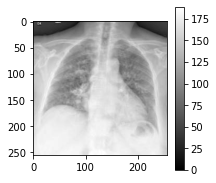

Label:  [1]	Actual Label:  [1]


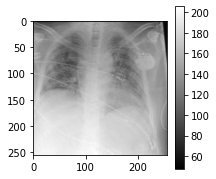

In [ ]:
# TO CHECK THE LABEL OF IMAGES .... AFTER K-MEANS CLUSTERING 

d = 0
for i in range(0,200):
  if k_means.labels_[i:i+1] == 1:
    d = d + 1
    if d < 11:
      print('Label: ', k_means.labels_[i:i+1],end="")
      print('\tActual Label: ',y[i:i+1])
      each = x[i]
      plt.figure(figsize=(3,3))
      plt.imshow(each.reshape(256,256),cmap = 'gray')
      plt.colorbar()
      plt.show()
    else:
      break

In [ ]:
# TO CHECK THE LABEL OF IMAGES .... AFTER K-MEANS CLUSTERING 
c = 0
for i in range(0,200):
  if k_means.labels_[i:i+1] == 0:
    c = c + 1
    if c < 11:
      print('Label: ', k_means.labels_[i:i+1],end="")
      print('\tActual Label: ',y[i:i+1])
      each = x[i]
      plt.figure(figsize=(3,3))
      plt.imshow(each.reshape(256,256),cmap = 'gray')
      plt.colorbar()
      plt.show()
    else:
      break

In [ ]:
# # TO CHECK THE LABEL OF IMAGES .... AFTER K-MEANS CLUSTERING 
# for i in range(0,200):
#     print('Label: ', k_means.labels_[i:i+1],end="")
#     print('\tActual Label: ',y[i:i+1])
#     each = x[i]
#     plt.figure(figsize=(3,3))
#     plt.imshow(each.reshape(256,256),cmap = 'gray')
#     plt.colorbar()
#     plt.show()

sklearn.metrics.accuracy_score(y_true, y_pred)

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [ ]:

score = metrics.accuracy_score(y,k_means.predict(x))
print('Accuracy:{0:f}'.format(score))

Accuracy:0.860000
